<a href="https://colab.research.google.com/github/RuthKassahun/Skin-Lesion-Classification/blob/main/glcm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy


In [ ]:
print(os.listdir("/content/drive/MyDrive/train/sample_train"))
SIZE = 224

['other', 'nevus']


In [ ]:
train_images = []
train_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/drive/MyDrive/train/sample_train/*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

other
/content/drive/MyDrive/train/sample_train/other/bcc01352.jpg
/content/drive/MyDrive/train/sample_train/other/mel00423.jpg
/content/drive/MyDrive/train/sample_train/other/mel02307.jpg
/content/drive/MyDrive/train/sample_train/other/bkl00221.jpg
/content/drive/MyDrive/train/sample_train/other/bkl01101.jpg
/content/drive/MyDrive/train/sample_train/other/bkl00327.jpg
/content/drive/MyDrive/train/sample_train/other/mel02208.jpg
/content/drive/MyDrive/train/sample_train/other/bcc01114.jpg
/content/drive/MyDrive/train/sample_train/other/bkl00870.jpg
/content/drive/MyDrive/train/sample_train/other/mel01310.jpg
/content/drive/MyDrive/train/sample_train/other/bkl00706.jpg
/content/drive/MyDrive/train/sample_train/other/ack00427.jpg
/content/drive/MyDrive/train/sample_train/other/mel01755.jpg
/content/drive/MyDrive/train/sample_train/other/mel00755.jpg
/content/drive/MyDrive/train/sample_train/other/mel02367.jpg
/content/drive/MyDrive/train/sample_train/other/mel00172.jpg
/content/drive/MyD

In [ ]:
train_images

array([[[194, 191, 191, ..., 197, 195, 195],
        [193, 190, 189, ..., 195, 197, 195],
        [192, 193, 191, ..., 194, 194, 195],
        ...,
        [190, 190, 188, ..., 175, 172, 174],
        [189, 191, 191, ..., 174, 176, 173],
        [188, 189, 193, ..., 174, 170, 174]],

       [[  2,   3,   4, ...,   1,   1,   1],
        [  3,   4,   6, ...,   1,   1,   1],
        [  3,   6,   7, ...,   1,   1,   1],
        ...,
        [  0,   1,   1, ...,   1,   1,   1],
        [  1,   1,   2, ...,   1,   1,   1],
        [  1,   1,   1, ...,   1,   1,   1]],

       [[162, 164, 163, ..., 127, 127, 127],
        [158, 166, 165, ..., 127, 129, 130],
        [159, 166, 164, ..., 128, 131, 130],
        ...,
        [123, 118, 123, ..., 123, 122, 118],
        [115, 118, 125, ..., 124, 120, 119],
        [113, 110, 122, ..., 121, 116, 118]],

       ...,

       [[168, 166, 167, ..., 162, 161, 160],
        [168, 166, 167, ..., 165, 167, 164],
        [167, 169, 167, ..., 165, 168, 164

In [ ]:
os.path.split(os.path.split('/content/drive/MyDrive/train/sample_train/nevus/nev00089.jpg')[0])[1]

'nevus'

In [ ]:
print(train_labels)

['other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'other' 'other' 'other' 'other' 'o

In [ ]:
test_images = []
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob("/content/drive/MyDrive/val/sample_val/*"):
    fruit_label = directory_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [ ]:
def feature_extractor(dataset):
  image_dataset  = pd.DataFrame()
  distance = [1, 3, 5, 8]
  angle = [0, np.pi/4, np.pi/2, 3*np.pi/4]
  for image in range(dataset.shape[0]):
    img = dataset[image]
    df = pd.DataFrame()
    count = 1
    for dist in distance:
      for ang in angle:
        GLCM = greycomatrix(img, [dist], [ang])      
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df[f'Energy{count}'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df[f'Corr{count}'] = GLCM_corr             
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df[f'Homogen{count}'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df[f'Contrast{count}'] = GLCM_contr
        count = count + 1
    image_dataset = image_dataset.append(df)    
  return image_dataset

In [ ]:
image_features = feature_extractor(x_train)
X_for_ML =image_features

In [ ]:
image_features

,Energy1,Corr1,Homogen1,Contrast1,Energy2,Corr2,Homogen2,Contrast2,Energy3,Corr3,...,Homogen14,Contrast14,Energy15,Corr15,Homogen15,Contrast15,Energy16,Corr16,Homogen16,Contrast16
0,0.041981,0.993662,0.310739,15.975276,0.039213,0.991157,0.280072,22.326510,0.042090,0.993906,...,0.136880,138.466101,0.028106,0.950569,0.142171,126.093378,0.027532,0.940702,0.133198,152.726244
0,0.066033,0.942049,0.360867,76.451133,0.061403,0.919390,0.335020,104.114641,0.066894,0.926871,...,0.193497,254.969068,0.045917,0.789881,0.180660,244.337798,0.046482,0.749162,0.190116,266.544504
0,0.031509,0.962944,0.259502,31.918502,0.029295,0.950573,0.228161,42.603511,0.034123,0.974177,...,0.107055,206.580065,0.021008,0.793633,0.117558,178.585131,0.021081,0.788526,0.114109,181.862659
0,0.072868,0.996796,0.345003,21.670944,0.069764,0.994523,0.298726,36.724125,0.071926,0.996509,...,0.147781,466.685296,0.053769,0.934745,0.148564,422.052910,0.049936,0.922351,0.144802,483.705075
0,0.024073,0.959817,0.238822,82.258548,0.023198,0.964573,0.224245,72.604275,0.027152,0.987342,...,0.106062,286.299154,0.016376,0.889088,0.115610,230.034123,0.015516,0.840896,0.097612,328.240805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.040713,0.987184,0.340579,21.009849,0.035544,0.978375,0.269621,35.552977,0.039503,0.980431,...,0.131948,183.205707,0.025482,0.884859,0.129195,192.813905,0.024573,0.881378,0.122940,200.462629
0,0.039158,0.974938,0.265185,24.392877,0.037430,0.968124,0.244473,31.059060,0.042844,0.981581,...,0.151456,93.593090,0.030278,0.918073,0.153353,80.300058,0.029648,0.906433,0.148583,93.028933
0,0.032533,0.979226,0.229811,41.405089,0.030499,0.972554,0.202671,54.897846,0.035453,0.985471,...,0.102736,265.866972,0.023024,0.894796,0.110901,215.048756,0.022459,0.886177,0.103761,235.322911
0,0.042498,0.942065,0.245370,526.963085,0.039632,0.927143,0.221025,657.707072,0.041700,0.934653,...,0.121122,1471.567881,0.026688,0.825040,0.110944,1518.566303,0.027156,0.814401,0.114888,1562.526871


In [ ]:
def feature_extractor_hsv(dataset_hsv):
  image_dataset_hsv  = pd.DataFrame()
 
  for image in range(dataset_hsv.shape[0]):
    img = dataset_hsv[image_dataset_hsv]
    df = pd.DataFrame()
    count = 1
    saturation = img[:, :, 1].mean()
    hue = img[:,:,1].mean()
    count = count + 1
    image_dataset_hsv = image_dataset_hsv.append(df)    
  return image_dataset_hsv

In [ ]:
import lightgbm as lgb
 #Class names for LGBM start at 0 so reassigning labels from 1,2,3,4 to 0,1,2,3
d_train = lgb.Dataset(X_for_ML, label=y_train)

# https://lightgbm.readthedocs.io/en/latest/Parameters.html
lgbm_params = {'learning_rate':0.05, 'boosting_type':'dart',    
              'objective':'binary',
              'metric': 'cross-entropy',
              'num_leaves':100,
              'max_depth':10,
              'num_class':1}  #no.of unique values in the target class not inclusive of the end value


lgb_model = lgb.train(lgbm_params, d_train, 100) #50 iterations. Increase iterations for small learning rates



In [ ]:
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_RF = np.reshape(test_features, (x_test.shape[0], -1))

In [ ]:
test_features

array([[[3.62649565e-02, 9.96594409e-01, 3.55410334e-01, ...,
         9.58537846e-01, 1.47811891e-01, 2.87193797e+02],
        [7.21776868e-02, 9.94802075e-01, 4.91749838e-01, ...,
         9.51024277e-01, 2.63012048e-01, 4.40408215e+01],
        [5.10898927e-02, 9.87875890e-01, 4.07465054e-01, ...,
         8.54672520e-01, 2.13166039e-01, 1.38774556e+02],
        ...,
        [1.23698315e-01, 9.97368952e-01, 5.05442078e-01, ...,
         9.27557054e-01, 3.03777838e-01, 8.36334442e+02],
        [5.37458639e-02, 8.95291670e-01, 2.95973924e-01, ...,
         7.17929803e-01, 1.81226803e-01, 1.11842585e+02],
        [4.85243556e-02, 8.33197013e-01, 3.39029948e-01, ...,
         4.40045583e-01, 1.37043039e-01, 3.11934349e+02]]])

In [ ]:
test_prediction = lgb_model.predict(test_for_RF)
#test_prediction=np.argmax(test_prediction, axis=1)
#Inverse le transform to get original label back. 
#test_prediction = le.inverse_transform(test_prediction)

In [ ]:
test_prediction

array([0.5461751 , 0.19297521, 0.44294024, 0.30165043, 0.63149619,
       0.69291245, 0.59814285, 0.10209632, 0.13917926, 0.87255806,
       0.18486203, 0.6822721 , 0.16655876, 0.23798979, 0.2084474 ,
       0.82397832, 0.31698913, 0.09326274, 0.62110367, 0.74825569,
       0.46752868, 0.15392991, 0.46523006, 0.6025078 , 0.12393002,
       0.34598054, 0.0840547 , 0.17969699, 0.7168389 , 0.17854706,
       0.82597711, 0.33938325, 0.10376763, 0.44970685, 0.52866046,
       0.25929484, 0.12331654, 0.41060274, 0.47193627, 0.34520658,
       0.65001273, 0.15225971, 0.32506948, 0.18236547, 0.8189864 ,
       0.32912238, 0.0896933 , 0.14701228, 0.79020348, 0.10266058,
       0.10779769, 0.37190849, 0.67562106, 0.42950149, 0.36024983,
       0.43319648, 0.16036442, 0.21253302, 0.47987983, 0.21623425,
       0.4289206 , 0.10803106, 0.91556257, 0.52174168, 0.44767109,
       0.16773763, 0.17765751, 0.10367064, 0.24138376, 0.13375577,
       0.21542616, 0.1481839 , 0.2346765 , 0.28837708, 0.33285

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy = ", accuracy_score(test_labels_encoded, test_prediction.round()))

Accuracy =  0.7062068965517241


In [ ]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels_encoded, test_prediction.round())

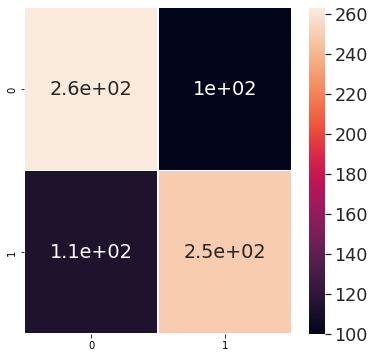

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# ORB

In [ ]:
class_names=os.listdir("/content/drive/MyDrive/train/sample_train")
print(class_names)

['other', 'nevus']


In [ ]:
def feature_orb(dataset):
  image_dataset  = pd.DataFrame()
  for image in range(dataset.shape[0]):
    img = dataset[image]
    df = pd.DataFrame()
    count = 1
    for dist in distance:
      for ang in angle:
        GLCM = greycomatrix(img, [dist], [ang])      
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df[f'Energy{count}'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df[f'Corr{count}'] = GLCM_corr             
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df[f'Homogen{count}'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df[f'Contrast{count}'] = GLCM_contr
        count = count + 1
    image_dataset = image_dataset.append(df)    
  return image_dataset